In [1]:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# read in student math performance data set
# use original encoding (numeric for ordinal vars)
student = pd.read_csv('data/student/student-por.csv', sep = ';')

In [3]:
student.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [4]:
student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
# one-hot encode all binary and nominal vars
# potential issue with binary vars?
nom_vars = student.columns[student.dtypes == 'object']
nom_vars_df = student[nom_vars]
nom_vars_df = pd.get_dummies(nom_vars_df, prefix = nom_vars)

# update dataset
student_new = pd.concat([student.drop(nom_vars, axis = 1), nom_vars_df], axis = 1)
student_new.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [6]:
# split into X and y
y = student_new['G3']
X = student_new.drop(['G1','G2','G3'], axis=1)

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
[y_train.size, y_test.size]

[519, 130]

## Regression tree

In [7]:
# fit regression tree model without 'regularizer'
regtree = DecisionTreeRegressor(min_samples_split=20, random_state=12) # how is random state used?
regtree = regtree.fit(X_train, y_train)

# predict
y_pred = regtree.predict(X_test)

# test MSE
np.mean((y_pred - y_test)**2)

11.492662045446211

In [8]:
np.mean(y_test) # MSE is huge compared to avg value!

12.023076923076923

In [9]:
# print tree
tree_data = export_graphviz(regtree, out_file=None) 
graph = graphviz.Source(tree_data) 
graph.render("output/regtree_noprune") # this tree is huge! another way to express how big it is?

'output\\regtree_noprune.pdf'

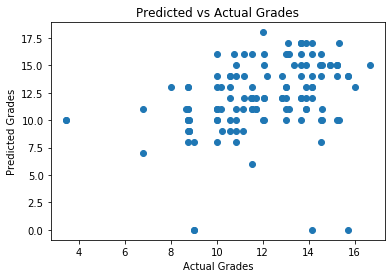

In [10]:
# plot predicted vs actual
plt.scatter(y_pred, y_test)
plt.title('Predicted vs Actual Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

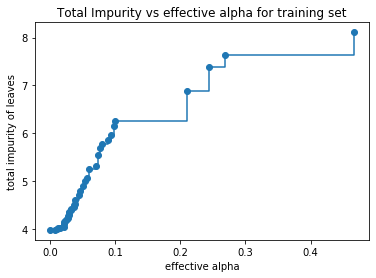

In [11]:
# get complexity for different tree sizes
path = regtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# plot
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")

In [12]:
# use cross validation to select complexity parameter
# use ccp_alphas obtained from fitting initial model on full dataset
#alphas = np.logspace(-50, 0, num = 50, base = 2)
alphas = np.linspace(0, 1, num = 50)
regs = []
cvs = []
for alpha in alphas:
    reg = DecisionTreeRegressor(random_state=13, ccp_alpha=alpha)
    cv = cross_val_score(reg, X_train, y_train, cv=5)
    cv = np.mean(cv)
    regs.append(reg)
    cvs.append(cv)

In [13]:
alphas

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

Text(0.5, 1.0, 'Cross-validation R^2 vs effective alpha')

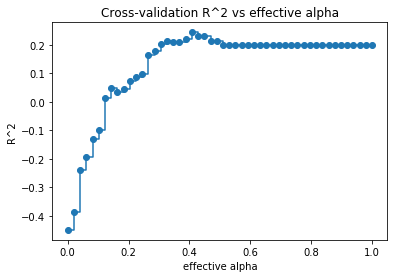

In [14]:
# plot CV results
ax = plt.gca()
ax.plot(alphas, cvs, marker='o', drawstyle="steps-post")
#ax.set_xscale('log', basex=2)
plt.xlabel("effective alpha")
plt.ylabel("R^2")
plt.title("Cross-validation R^2 vs effective alpha")

In [15]:
# get optimal alpha
opt_alpha = alphas[np.argmax(cvs)]

In [16]:
# fit regression tree model
regtree_optim = DecisionTreeRegressor(min_samples_split=20, random_state=14, ccp_alpha=0.41) # how is random state used?
regtree_optim = regtree_optim.fit(X_train, y_train)

# R^2 for training set 
r2_train = regtree_optim.score(X_train, y_train)

# R^2 for testing set
r2_test = regtree_optim.score(X_test, y_test)

[r2_train, r2_test]

[0.2526090080284128, 0.15087266451557735]

In [17]:
regtree_optim.get_depth()

2

In [18]:
regtree_optim.get_n_leaves()

3

In [19]:
X_train.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

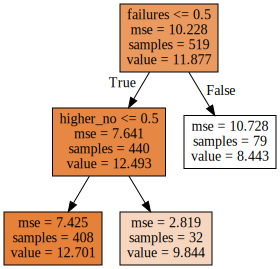

In [21]:
tree_data = export_graphviz(regtree_optim, 
                                 out_file=None, 
                                 feature_names=X_train.columns, 
                                 filled=True) 
graph = graphviz.Source(tree_data)
graph

## Random Forest 

In [107]:
# one forest with 100 trees
rf = RandomForestRegressor(n_estimators = 100, max_features='sqrt')
rf.fit(X_train, y_train)

# predict
y_pred_rf = rf.predict(X_test)

# test MSE
np.mean((y_pred_rf - y_test)**2)

8.786926153846155

In [37]:
# vary number of trees
n_trees = range(20,200)
rfs = []
oob_errs = []
for n_tree in n_trees:
    rf = RandomForestRegressor(n_estimators = n_tree, max_features='sqrt', oob_score=True)
    rf.fit(X_train, y_train)
    
    # get OOB prediction
    oob_pred = rf.oob_prediction_
    
    # calc OOB MSE
    oob_err = np.mean((oob_pred - y_train)**2)
    
    rfs.append(rf)
    oob_errs.append(oob_err)

Text(0.5, 1.0, 'OOB MSE vs. number of trees')

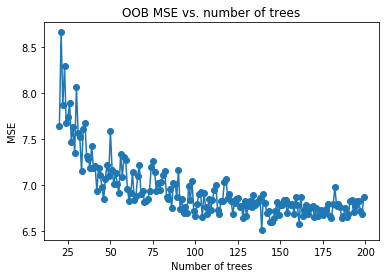

In [38]:
# plot OOB errors
ax = plt.gca()
ax.plot(n_trees, oob_errs, marker='o')
#ax.set_xscale('log', basex=2)
plt.xlabel("Number of trees")
plt.ylabel("MSE")
plt.title("OOB MSE vs. number of trees")

In [79]:
# vary both number of trees and number of features
n_features = [1, 5, 10, 25, 56]
n_trees = range(20,200,2)
oob_errs = []
for n_feature in n_features:
    for n_tree in n_trees:
        rf = RandomForestRegressor(n_estimators = n_tree, max_features=n_feature, oob_score=True)
        rf.fit(X_train, y_train)

        # get OOB prediction
        oob_pred = rf.oob_prediction_

        # calc OOB MSE
        oob_err = np.mean((oob_pred - y_train)**2)

        oob_errs.append([n_feature, n_tree, oob_err])
        
    print('n features: ', n_feature)

n features:  1
n features:  5
n features:  10
n features:  25


C:\Users\kathy\Miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n features:  56


Text(0.5, 1.0, 'OOB MSE vs. number of trees')

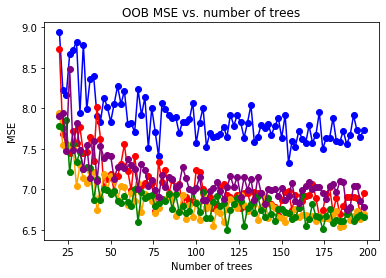

In [80]:
# reshape output
oob_errs_df = pd.DataFrame(oob_errs, columns =['n_feature', 'n_tree', 'oob_err'])
oob_errs_pv = oob_errs_df.pivot(index='n_tree', columns='n_feature', values='oob_err')

# plot
# ax = plt.gca()
# ax.plot(n_trees, oob_errs, marker='o')
plt.plot(n_trees, oob_errs_pv[1], marker='o', color='blue')
plt.plot(n_trees, oob_errs_pv[5], marker='o', color='red')
plt.plot(n_trees, oob_errs_pv[10], marker='o', color='orange')
plt.plot(n_trees, oob_errs_pv[25], marker='o', color='green')
plt.plot(n_trees, oob_errs_pv[56], marker='o', color='purple')
#plt.plot('n_tree', '5', data=oob_errs_pv, marker='o', color='red')
# plt.plot('n_tree', '10', data=oob_errs_pv, marker='o', color='orange')
# plt.plot('n_tree', '25', data=oob_errs_pv, marker='o', color='green')
#plt.legend()
plt.xlabel("Number of trees")
plt.ylabel("MSE")
plt.title("OOB MSE vs. number of trees")

In [94]:
# get optimal # of trees and features
row = oob_errs_df['oob_err'].idxmin()
oob_errs_df.iloc[row,] # probably just a fluke though - use visual inspection

n_feature     25.000000
n_tree       118.000000
oob_err        6.497792
Name: 319, dtype: float64

In [109]:
# forest with 100 trees and sqrt(D) features (around 7)
rf_optim = RandomForestRegressor(n_estimators = 150, max_features='sqrt')
rf_optim.fit(X_train, y_train)

# predict
y_pred_rf_optim = rf_optim.predict(X_test)

# test MSE
np.mean((y_pred_rf_optim - y_test)**2)

# R^2 for training set 
r2_train = rf_optim.score(X_train, y_train)

# R^2 for testing set
r2_test = rf_optim.score(X_test, y_test) # should I use OOB score here?

[r2_train, r2_test] # describes the data very well but prediction is still poor (better than single tree, however)

[0.9117124452794795, 0.21257791354815414]